<a href="https://colab.research.google.com/github/shubhamraut0209/Personal-Projects-Portfolio/blob/main/Breast_Cancer_Diagnosis_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Breast Cancer Diagnosis Prediction

**Objective:** Use diagnostic features of cell nuclei to classify tumors as malignant or benign, using supervised machine learning models.

# **Step 1: Import Libraries**

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

# **Step 2: Load & Explore Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/data.csv')

# Display first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Check dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (569, 33)


In [ ]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# **Step 3: Cleaning & Preprocessing**

**✅ Step 3.1: Drop Unnecessary Columns**

In [ ]:
# Drop ID column if present
df.drop(columns=['id'], inplace=True, errors='ignore')

In [ ]:
# If there's an unnamed column at the end (often empty), drop it too
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

**✅ Step 3.2: Encode Target Variable**

In [ ]:
# Encode diagnosis column

# The diagnosis column has values: M = Malignant, B = Benign. Let’s convert them to binary:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

**✅ Step 3.3: Check Class Balance**

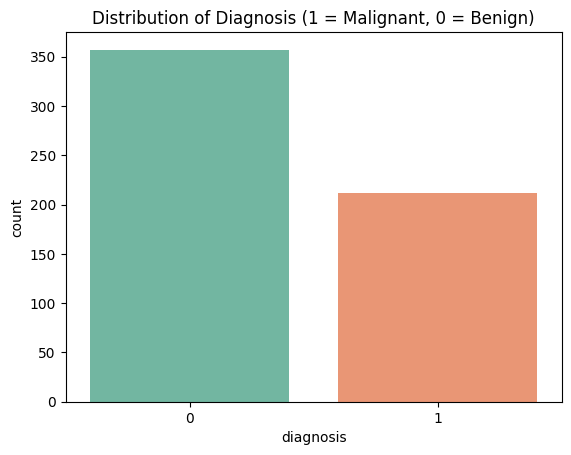

In [ ]:
# Class distribution
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (1 = Malignant, 0 = Benign)')
plt.show()

In [ ]:
# Print percentages
df['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
0,0.627417
1,0.372583


***Interpretation:-***

* 📊 **Insight: Class Distribution:**

   * The dataset contains **more benign cases (label = 0)** than malignant cases (label = 1).
   * **Benign cases ≈ 360**, **Malignant cases ≈ 210**.
   * This indicates a **class imbalance**, though it's not extreme.

* 🔍 **Why This Matters:**

   * Class imbalance can bias certain machine learning models toward the majority class (benign), potentially reducing the sensitivity to malignant cases.
   * In medical diagnostics, **false negatives** (missing a malignant case) are especially risky — so you'll want to ensure your model is **evaluated carefully** using precision, recall, F1-score, and maybe even **resampling techniques** (SMOTE, stratified sampling).

**✅ Step 3.4: Final Check for Duplicates or Missing Values**

In [ ]:
# Check again for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Duplicate Rows: 0


# **Step 4: Exploratory Data Analysis (EDA)**

**✅ Step 4.1: Correlation Heatmap (Top Predictors)**

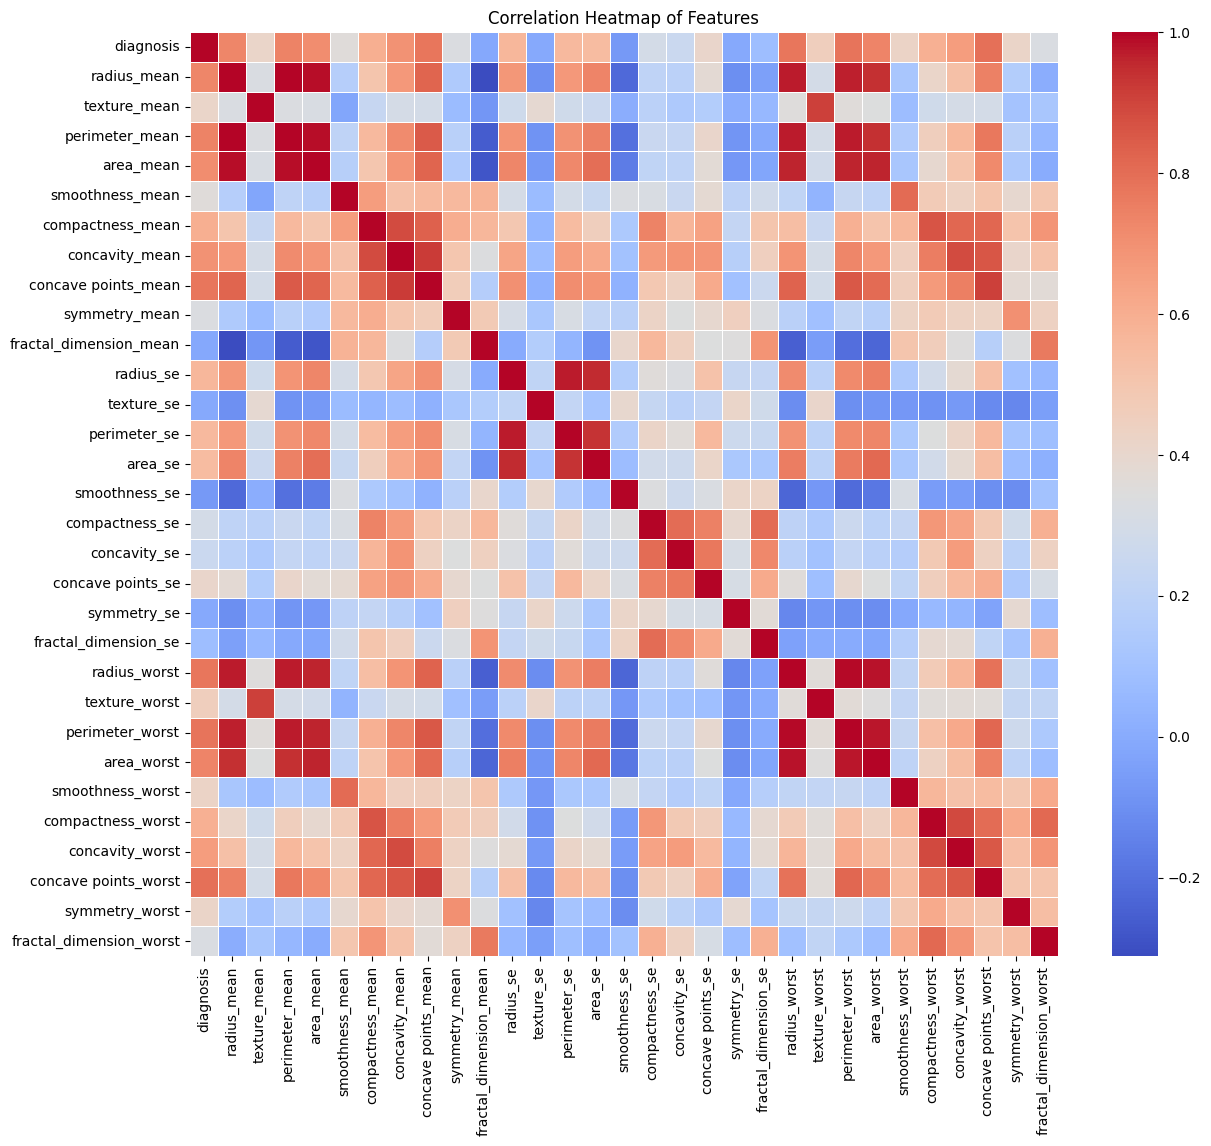

In [ ]:
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

***Interpretation:-***

* The **diagnosis** variable (target) shows **strong positive correlation** with features like:

  * `radius_mean`
  * `perimeter_mean`
  * `area_mean`
  * `concavity_mean`
  * `concave points_mean`

  These features **increase** as the likelihood of a **malignant tumor** increases.

* Features like `smoothness_mean` and `fractal_dimension_mean` show **weaker or even negative correlation**, indicating less influence on the diagnosis.

In [ ]:
# Top correlations with diagnosis
corr_target = corr['diagnosis'].abs().sort_values(ascending=False)              # View most correlated features with diagnosis
print("Top Correlated Features with Diagnosis:\n", corr_target.head(10))

Top Correlated Features with Diagnosis:
 diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


**✅ Step 4.2: Violin Plots of Key Features vs Diagnosis**

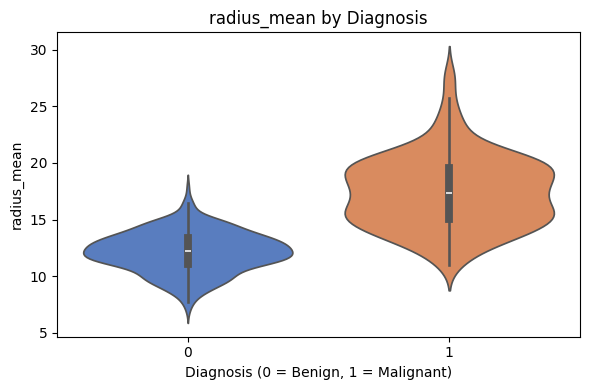

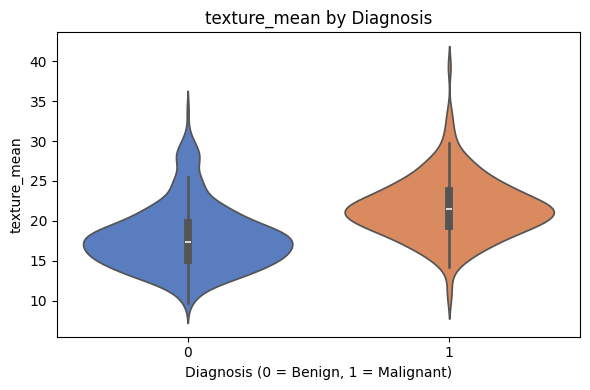

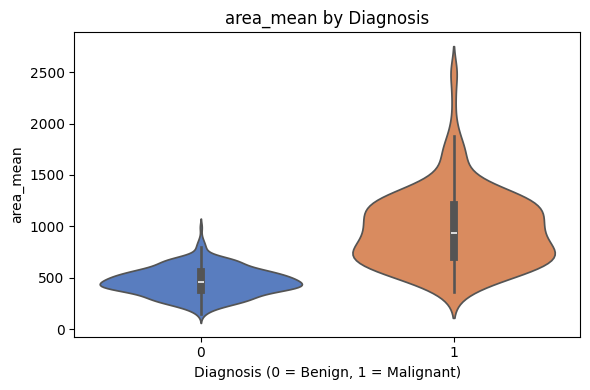

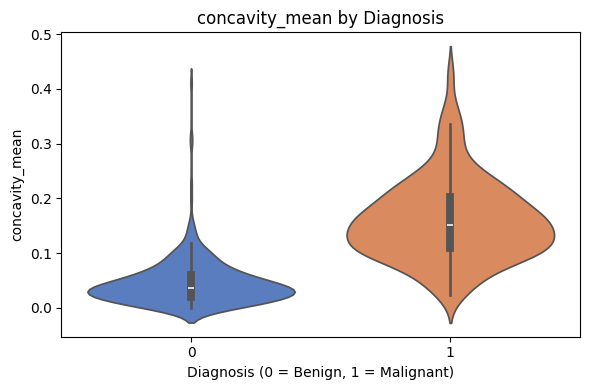

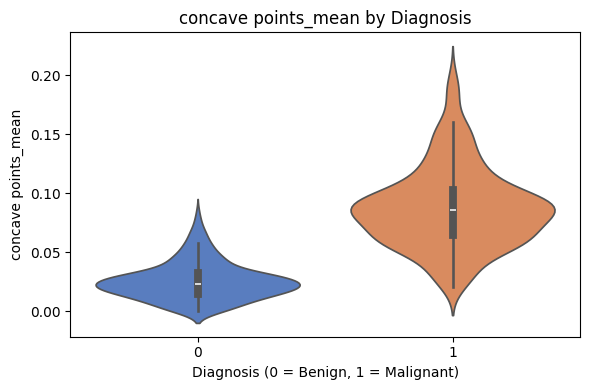

In [ ]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='muted')
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

***Interpretation:-***

* **Malignant tumors** consistently show higher and wider distributions than benign across all features.

* Particularly, **area_mean** and **concave points_mean** show strong class separation—this validates their importance from the Random Forest plot.

**✅ Step 4.3: Pairplot of Top Predictive Features**

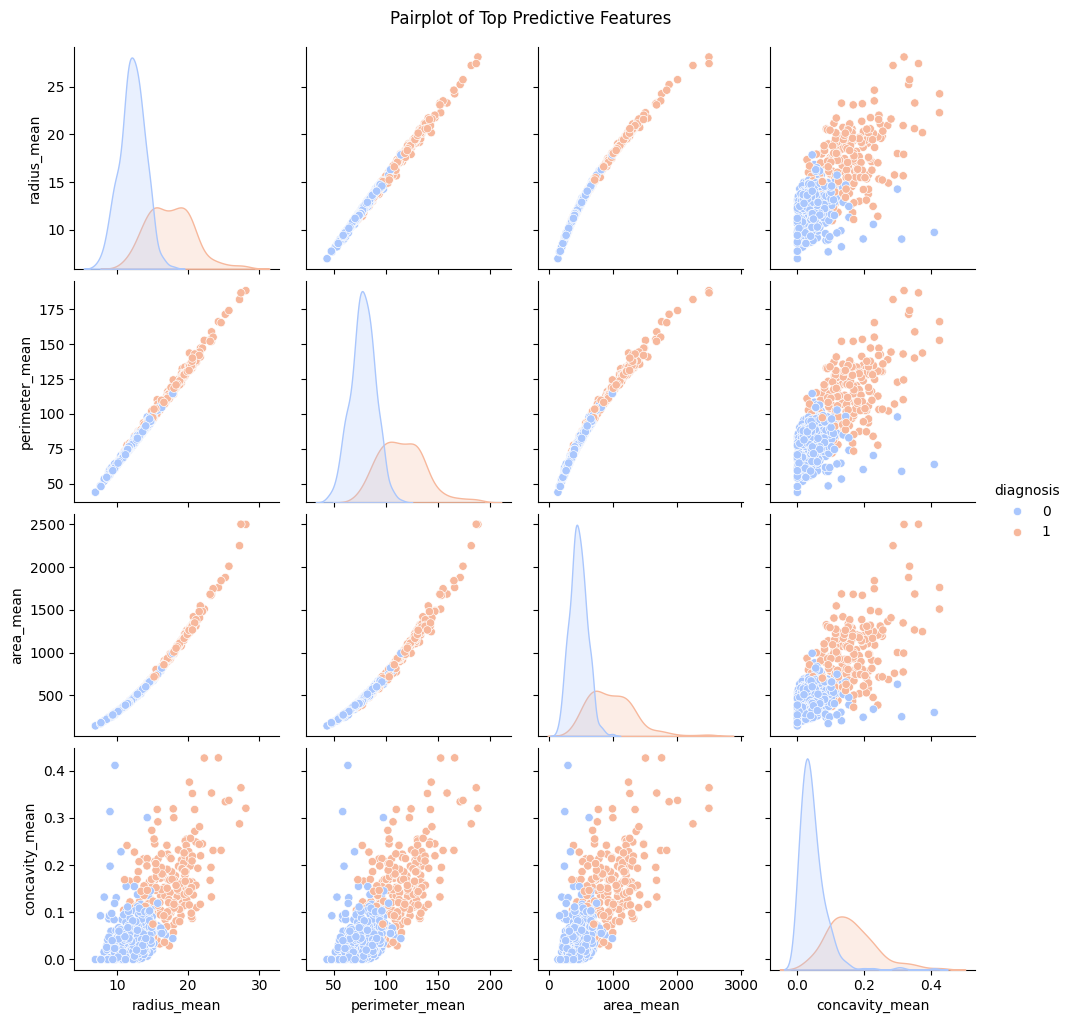

In [ ]:
top_feats = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'diagnosis']
sns.pairplot(df[top_feats], hue='diagnosis', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Top Predictive Features", y=1.02)
plt.show()

***Interpretation:-***  
Feature Separation Between **Malignant (1)** and **Benign (0)** Tumors

* **Clear Class Separation:**
  Malignant tumors (`diagnosis = 1`, orange) tend to have **higher values** for:

  * `radius_mean`
  * `perimeter_mean`
  * `area_mean`
  * `concavity_mean`

  compared to benign tumors (`diagnosis = 0`, blue).

* **Strong Positive Correlation Between Features:**
  There’s a **high linear relationship** between:

  * `radius_mean`, `perimeter_mean`, and `area_mean`
    These features increase together and are highly predictive of malignancy.

* **Concavity Mean Adds Separation:**
  `concavity_mean` is especially useful — malignant cases cluster at **higher concavity**, while benign ones stay lower.

* **Useful for Classification Models:**
  These features exhibit strong **inter-class visual boundaries**, which helps classification algorithms distinguish between benign and malignant cases.

**✅ Step 4.4: Feature Distribution by Class**

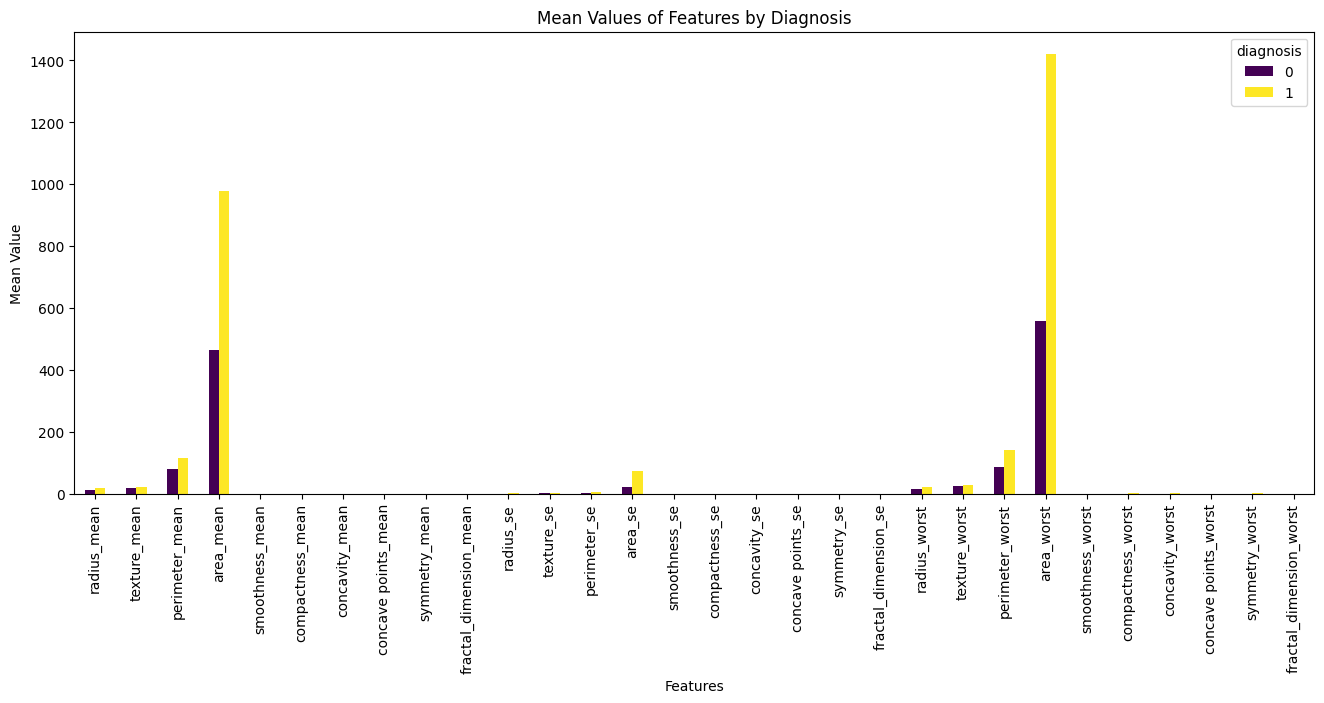

In [ ]:
# Plot all features grouped by class
means = df.groupby('diagnosis').mean()
means.T.plot(kind='bar', figsize=(16, 6), colormap='viridis')
plt.title('Mean Values of Features by Diagnosis')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

***Interpretation:-***

* 📊 **Mean Values of Features by Diagnosis (Benign vs. Malignant)**

   * **Overall Observation:**
  Malignant tumors (`diagnosis = 1`, yellow) consistently show **higher mean values** across most features compared to benign tumors (`diagnosis = 0`, purple).

* 🔑 **Key Features with Major Differences:**

   1. **`area_mean`, `area_worst`:**
      * Drastically higher in malignant tumors.
      * Indicates that **tumor size** is a critical differentiator.

   2. **`radius_mean`, `perimeter_mean`, `radius_worst`, `perimeter_worst`:**
      * Significantly larger for malignant tumors.
      * Suggests malignant tumors tend to be **larger and more irregularly shaped**.

   3. **`concavity_mean`, `concave points_mean`, `compactness_mean`:**
      * These features, representing **irregularities and edges**, are much higher in malignant tumors.

* 📌 **Minor Differences:**

   * Features like `smoothness`, `symmetry`, and `fractal_dimension` (especially their `_se` variants) show **less pronounced differences**, and may carry **lower predictive power**.

# **Step 5: Model Building & Evaluation**

**✅ Step 5.1: Feature & Target Separation**

In [ ]:
# Define X and y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

**✅ Step 5.2: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**✅ Step 5.3: Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Predict
log_pred = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))

Logistic Regression Results:
[[71  1]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702


**✅ Step 5.4: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Results:
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


**✅ Step 5.5: Feature Importance (from Random Forest)**

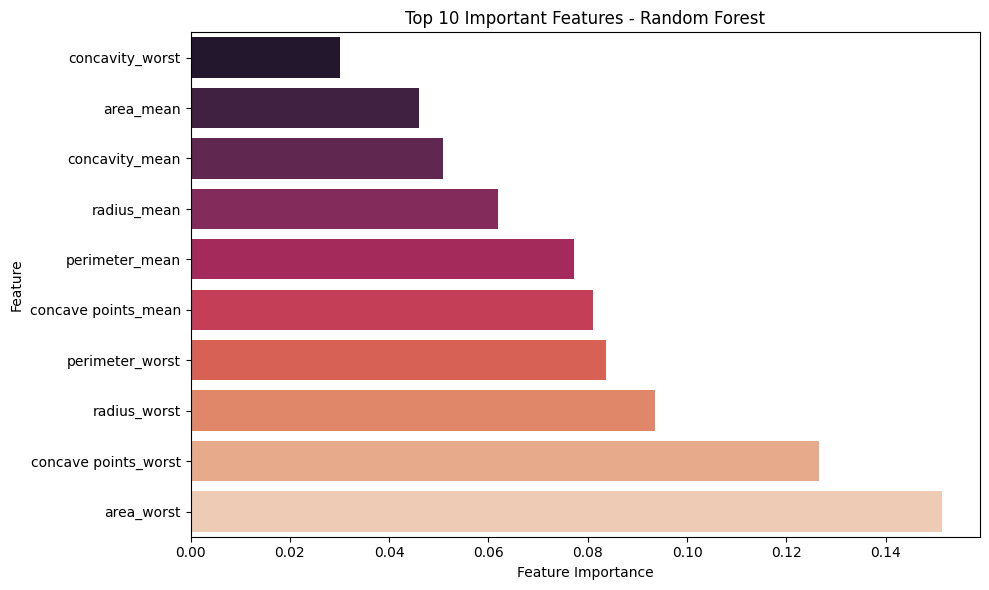

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 important features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='rocket')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

***Interpretation:-***

This bar chart ranks the features based on their importance scores in predicting whether a tumor is **benign (0)** or **malignant (1)**.


* 🔝 **Most Influential Features:**

  1. **`area_worst`** *(Highest Importance)*

   * The size of the tumor in its worst (largest/most irregular) form is the most predictive feature.

  2. **`concave points_worst`**, **`radius_worst`**

   * These features reflect **shape complexity** and **size extremes**, both strongly linked to malignancy.

  3. **`perimeter_worst`**, **`concave points_mean`**, **`perimeter_mean`**

   * Indicate that both average and extreme **boundary complexity** help classify tumors accurately.


* 🟣 **Also Important:**

  * **`radius_mean`**, **`concavity_mean`**, **`area_mean`**, **`concavity_worst`**
  These features focus on **general size** and **indentation** patterns of the tumor, which are vital for the model to distinguish between classes.

* ✅ **Key Takeaway:**

   * The model relies heavily on **geometric** and **textural characteristics**, especially **area, radius, perimeter, and concave points**, particularly in their **worst-case values**.
   * These align well with both domain knowledge and the earlier statistical plots—validating their diagnostic significance.

# **Step 6: Final Interpretation & Key Takeaways**

**🔍 What the Project Did:-**
* Built ML models to predict whether a tumor is benign (0) or malignant (1) using diagnostic features of cell nuclei.

----

**📊 Key Insights:-**
* Features like radius_mean, area_mean, concavity_mean, and perimeter_mean show strong correlation with malignancy.

* Random Forest outperformed Logistic Regression (likely with higher F1-score and recall).

* Visual EDA revealed clear separations in distributions between benign and malignant cases.

---

**💡 Business Value:-**
* Such models could assist doctors in early diagnosis and automated triage using objective lab features.

* Feature importance rankings help highlight which metrics should be prioritized in diagnostics.